In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Set param: C can be any complex number (some to try: 1, -1, 1j, 1/4, ...)
C = 1j 

# Plotting window dimensions
X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = X_MIN, X_MAX

# Resolution
DIM = 300
MAX_ITER = 50

In [3]:
f = lambda z: z**2 + C

In [4]:
R = (1 + np.sqrt(1 + 4*np.abs(C))) / 2

In [5]:
def init_matrices():
    xvals = np.linspace(X_MIN, X_MAX, DIM)
    yvals = np.linspace(Y_MIN, Y_MAX, DIM)
    iterate_window = np.zeros([DIM, DIM]) * 0+0j
    color_window = np.zeros([DIM, DIM])
    for i, x in enumerate(xvals):
        for j, y in enumerate(yvals):
            iterate_window[i, j] = x + y*1j
    return iterate_window, color_window

In [6]:
def iterate(i_window, c_window, iteration=1):
    for i in range(DIM):
        for j in range(DIM):
            z = i_window[i, j]
            fz = f(z)
            i_window[i, j] = fz
            if np.abs(fz) > R:
                c_window[i, j] = iteration
    return i_window, c_window

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in absolute
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cdouble_scalars
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


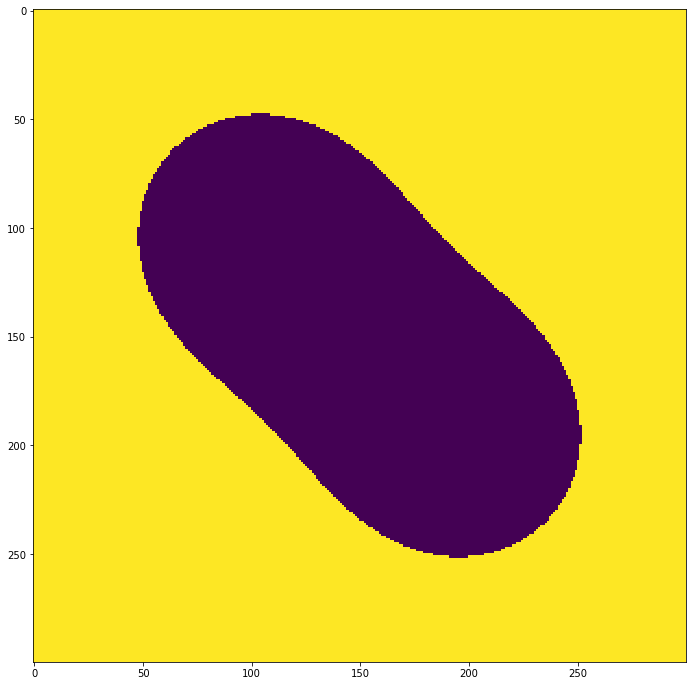

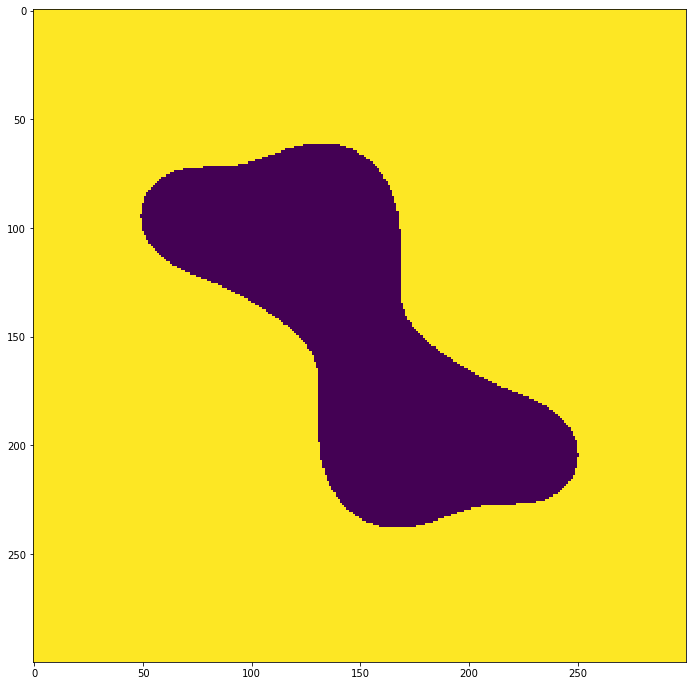

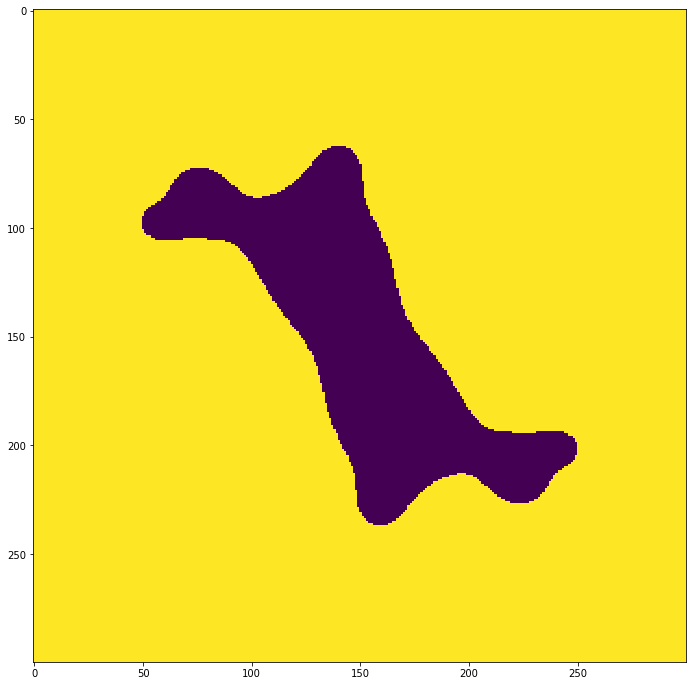

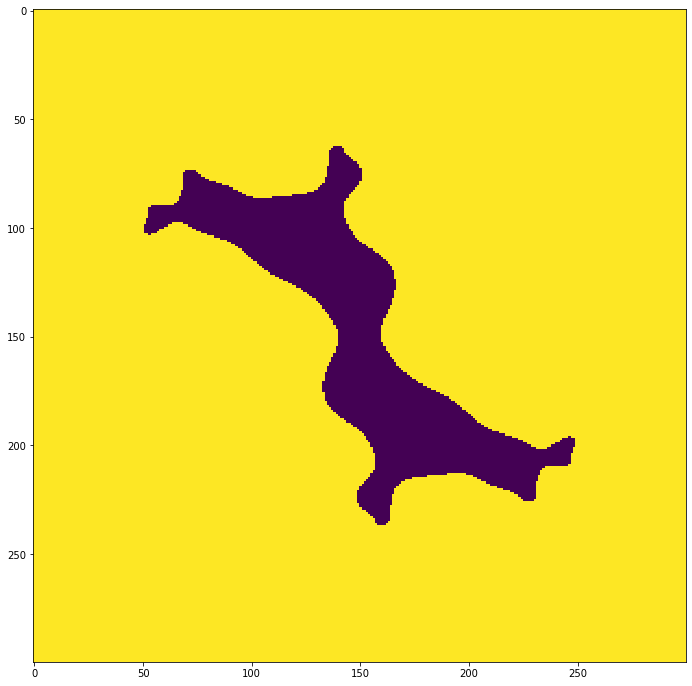

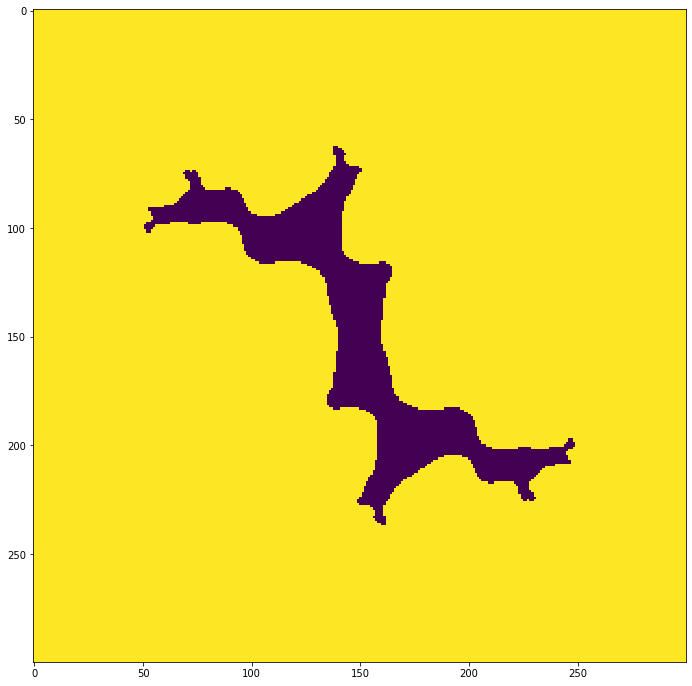

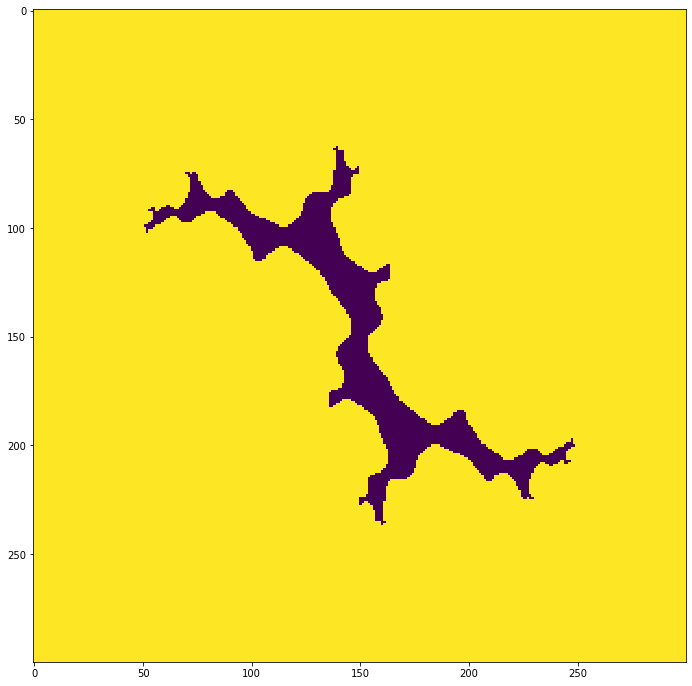

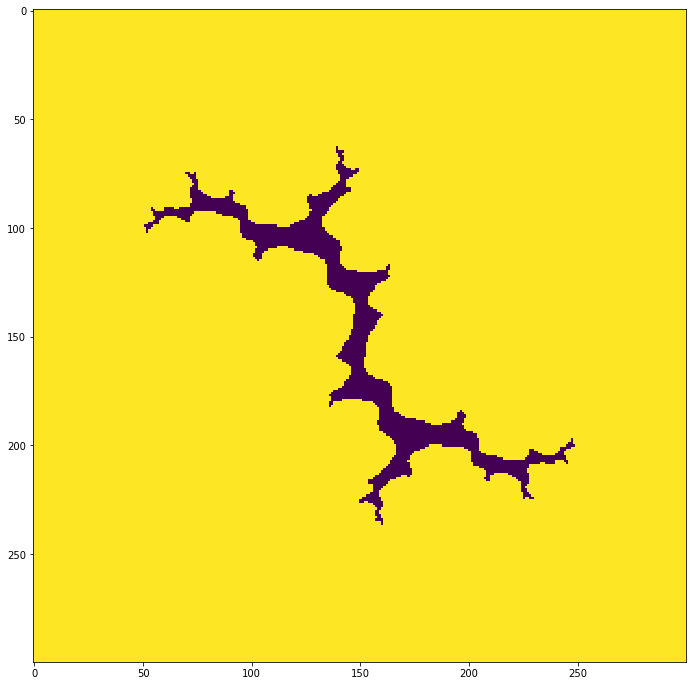

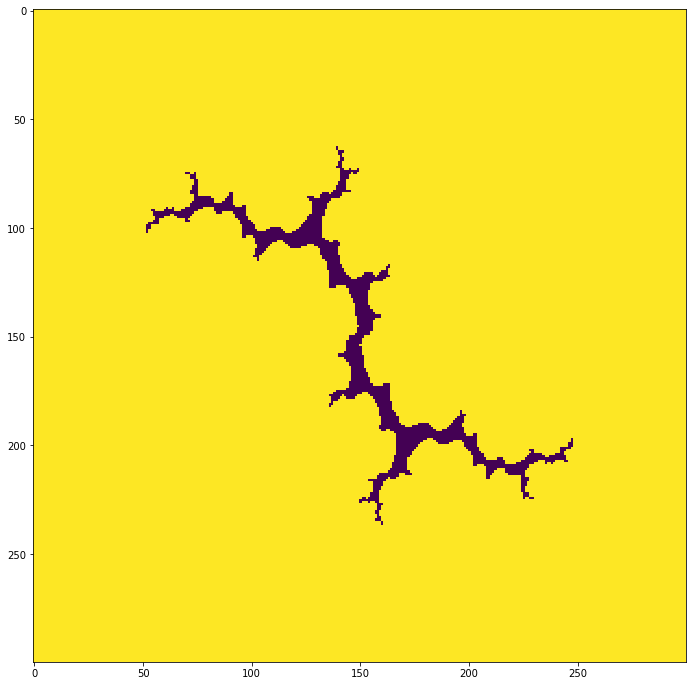

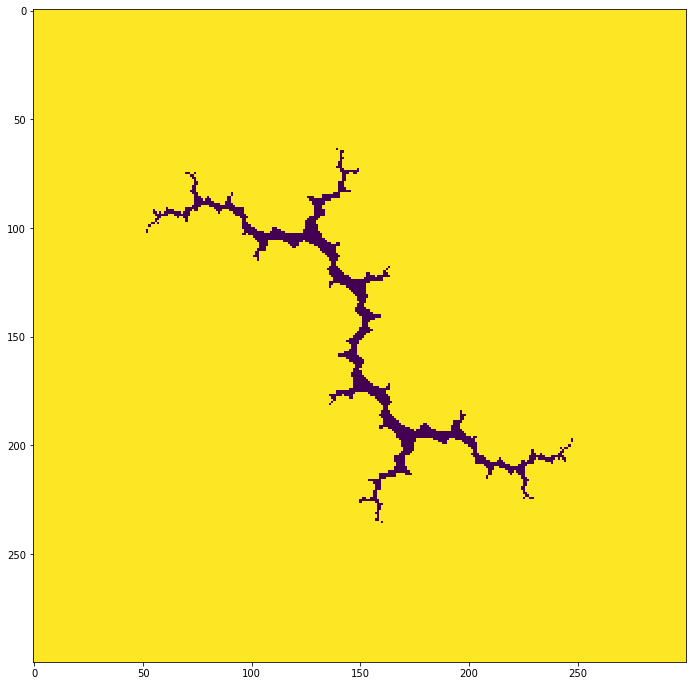

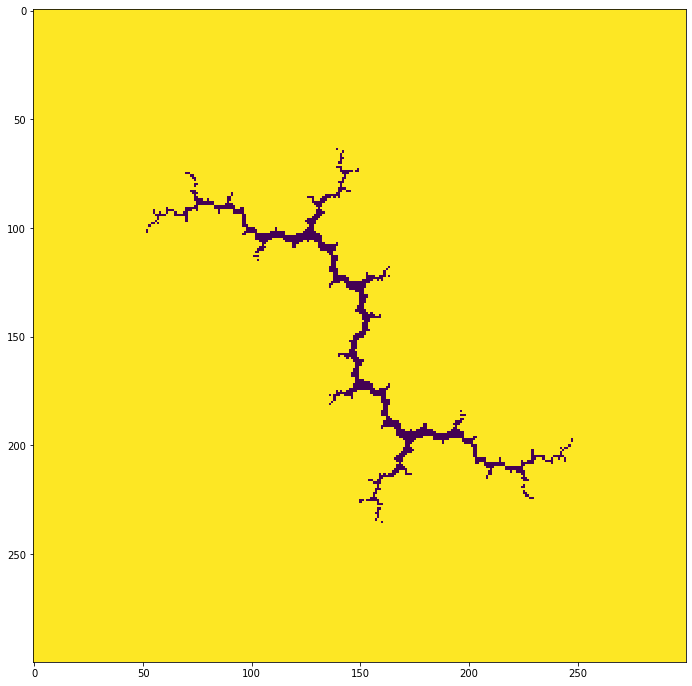

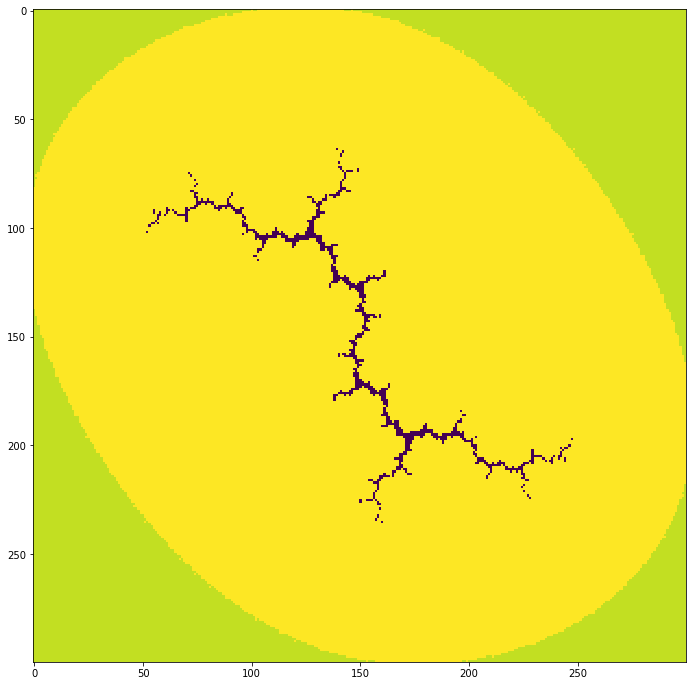

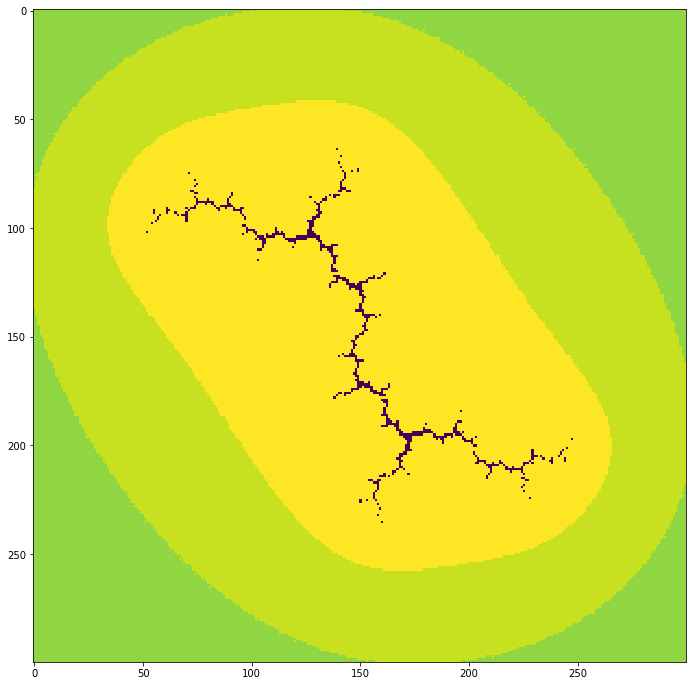

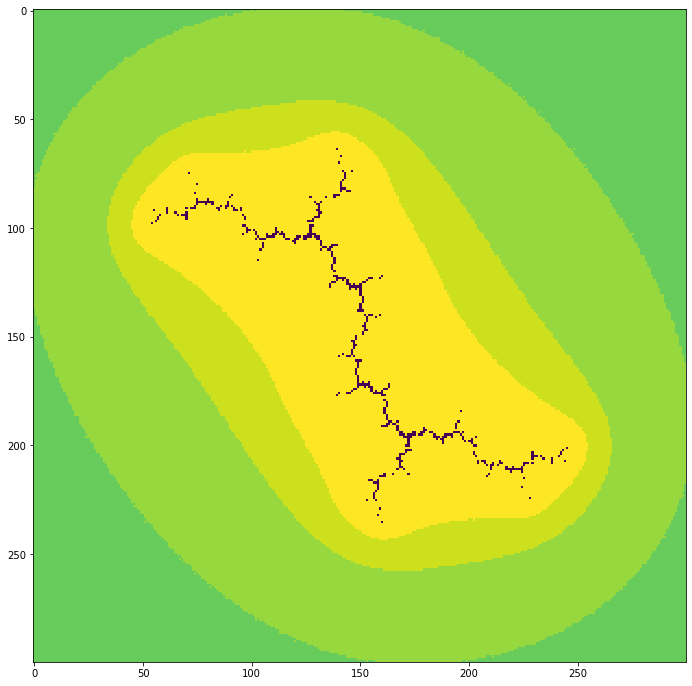

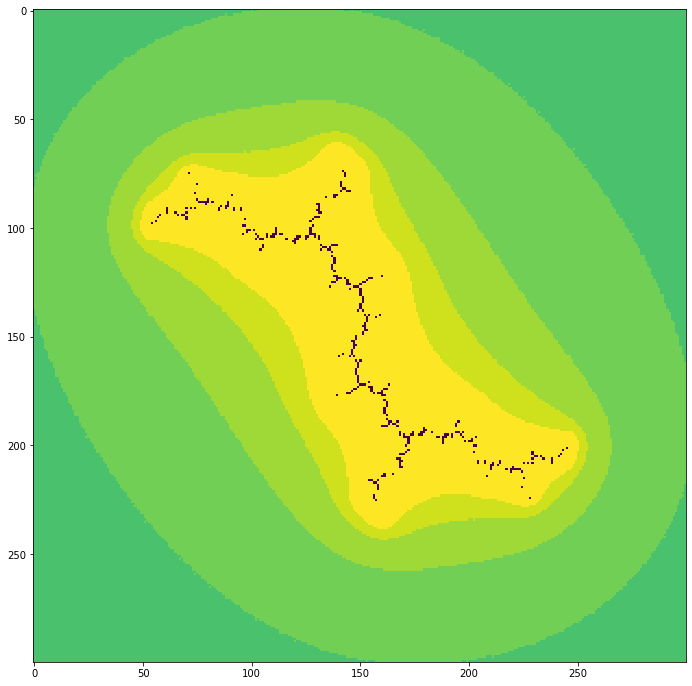

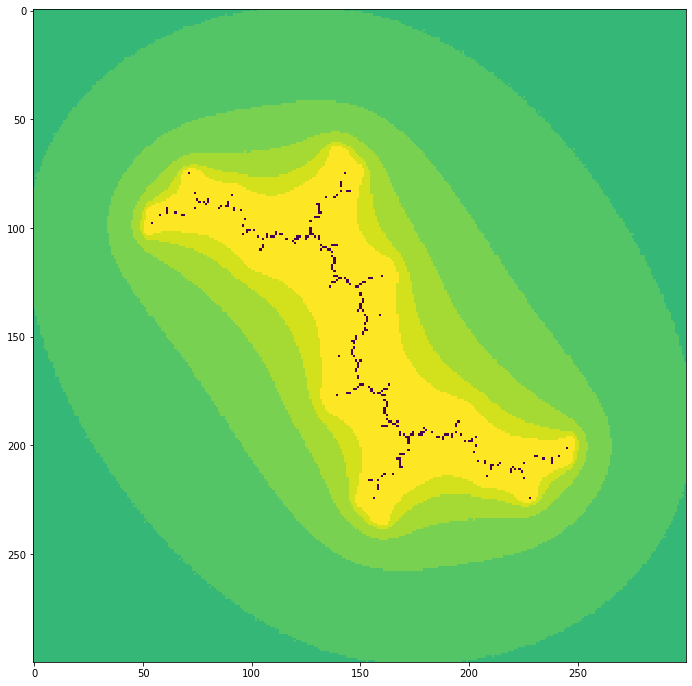

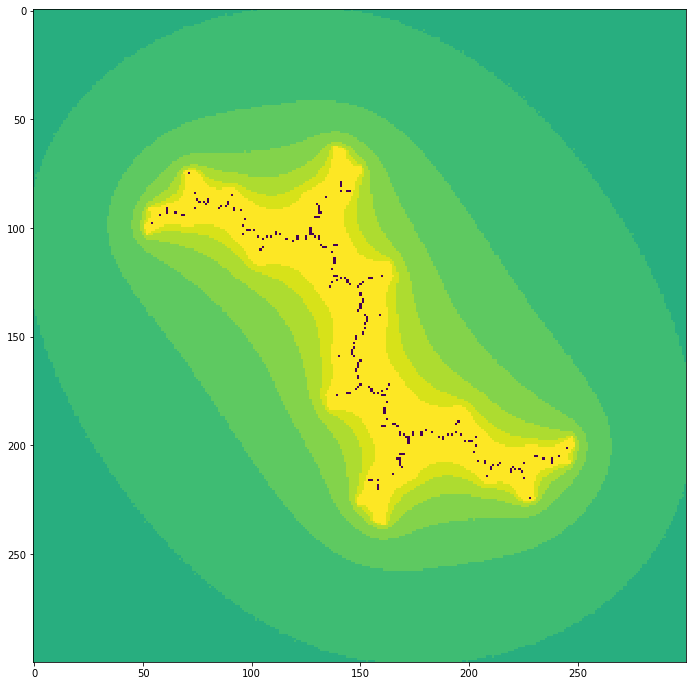

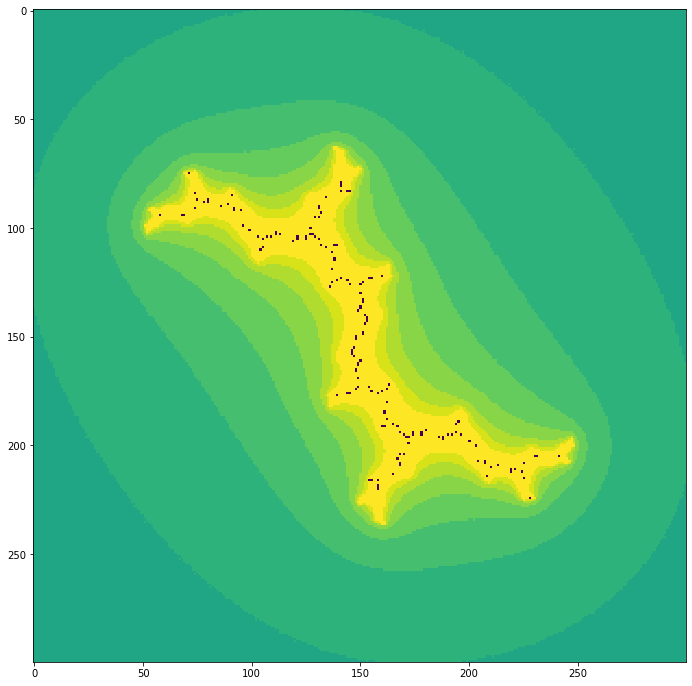

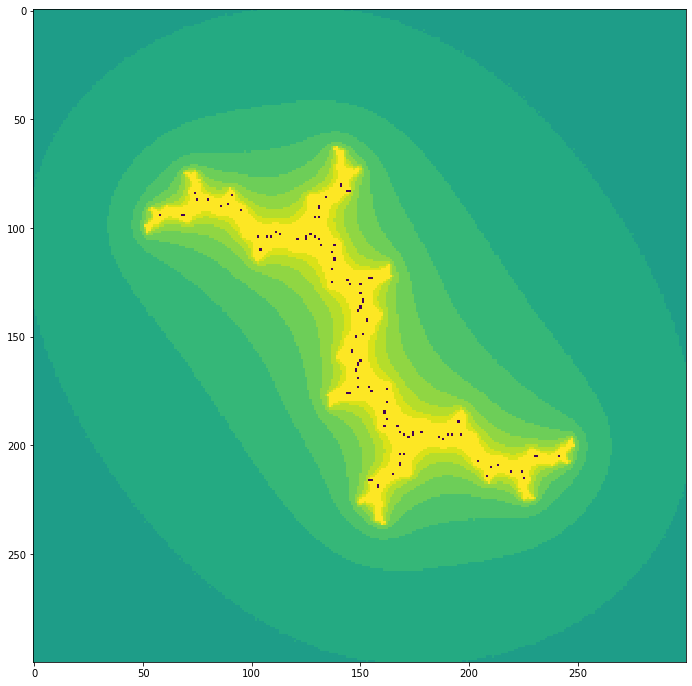

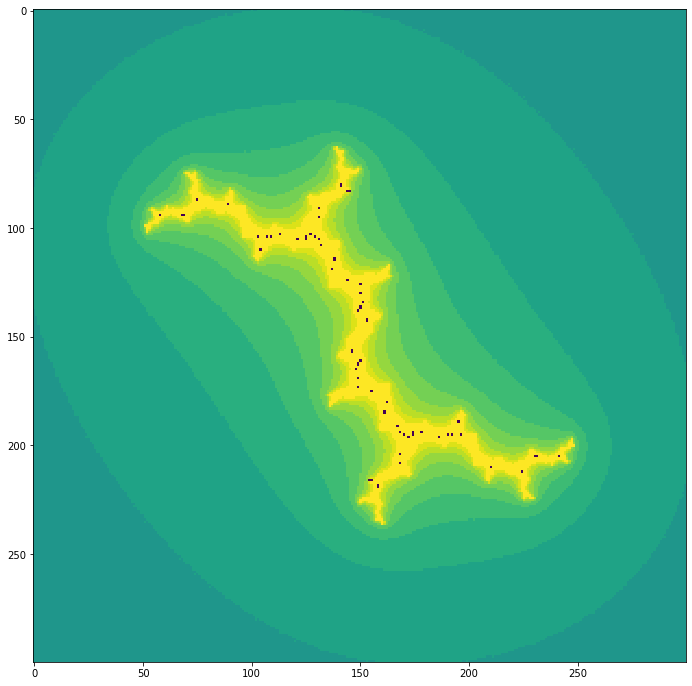

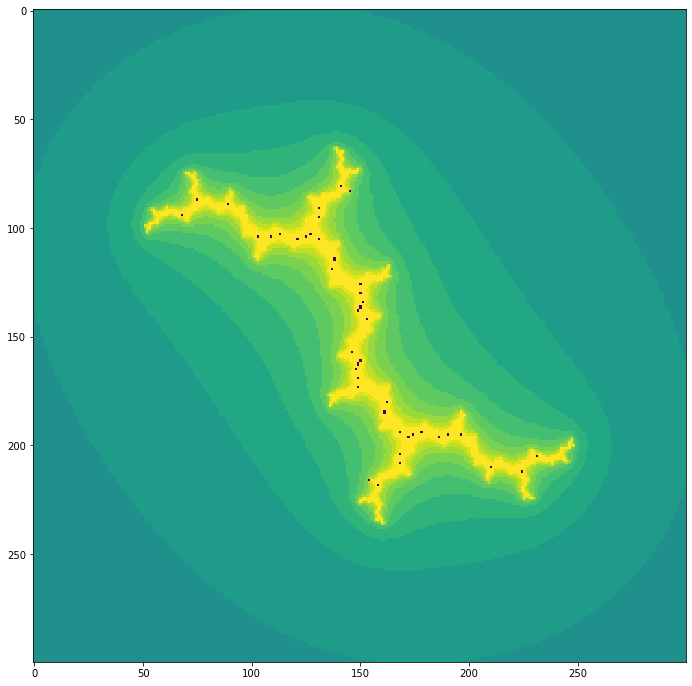

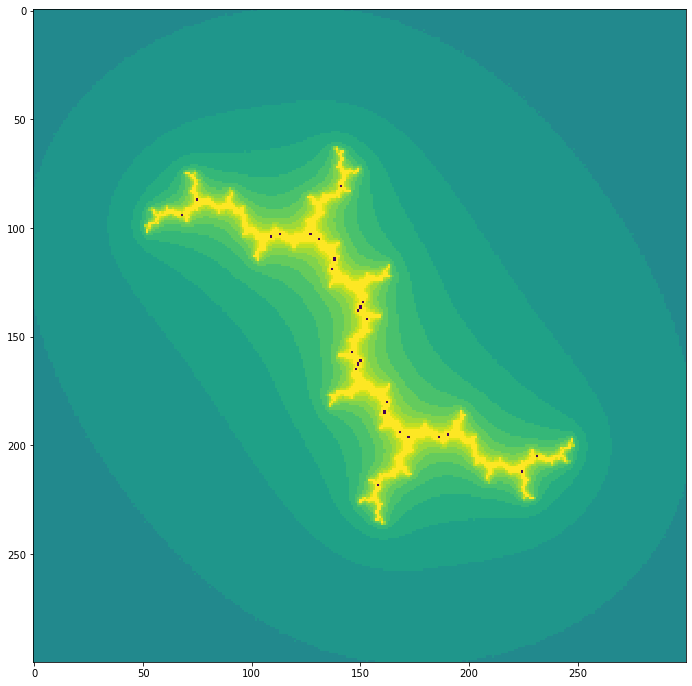

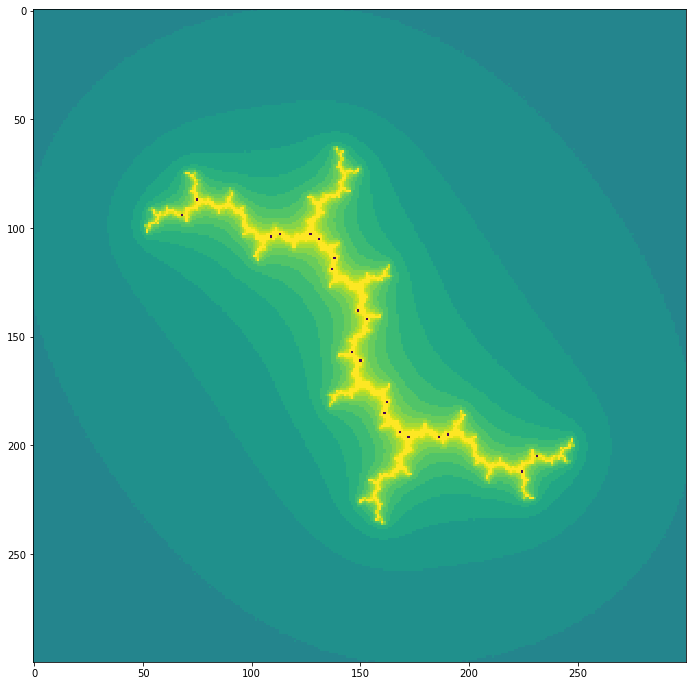

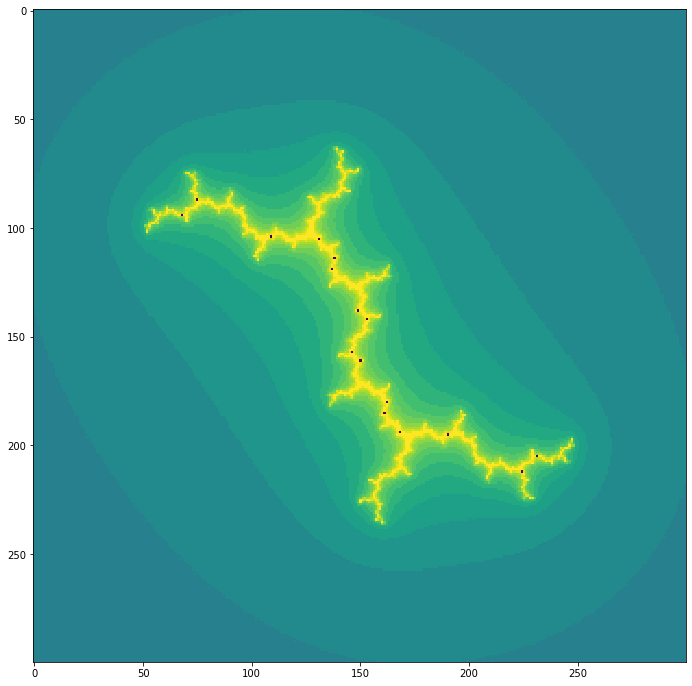

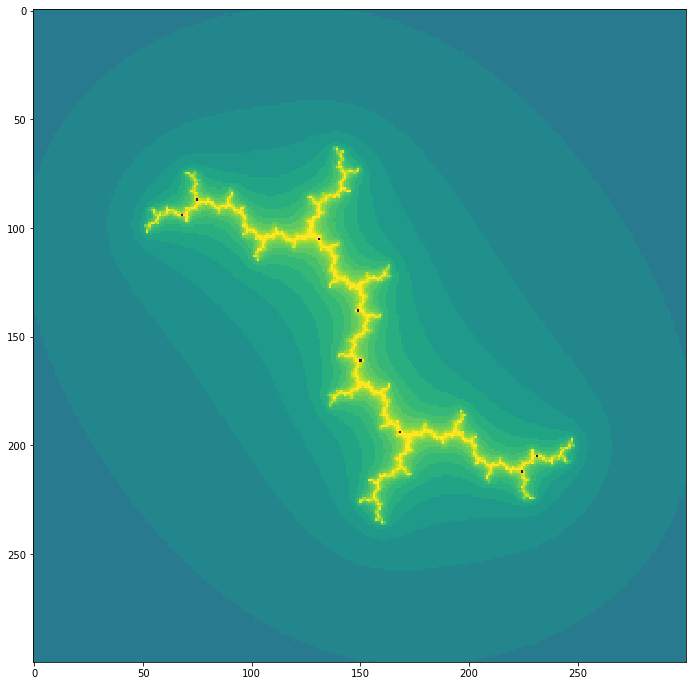

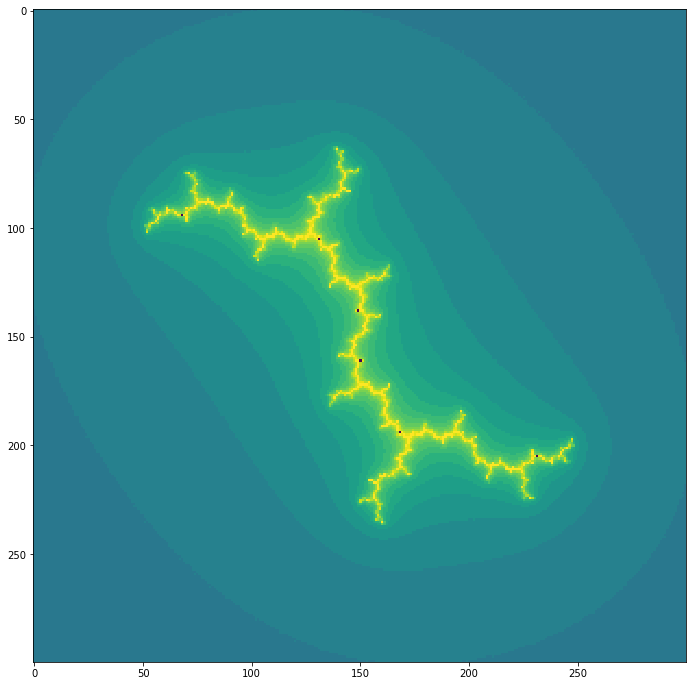

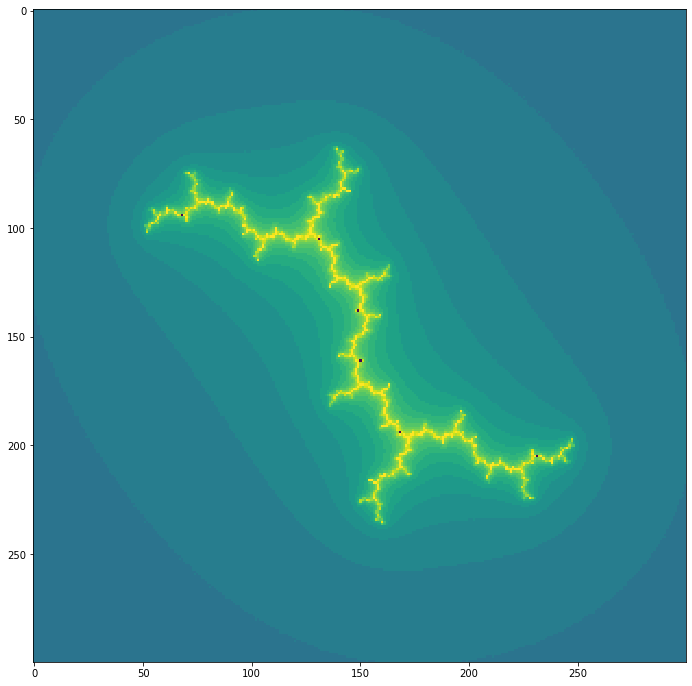

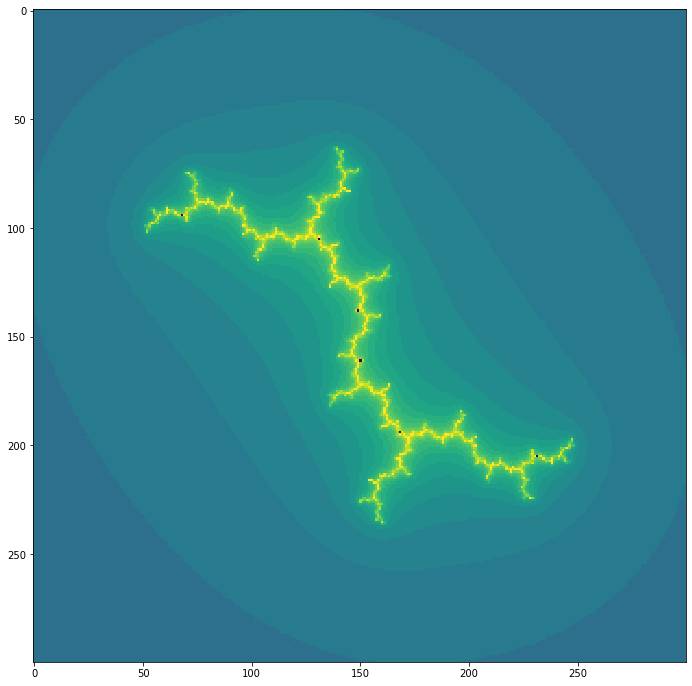

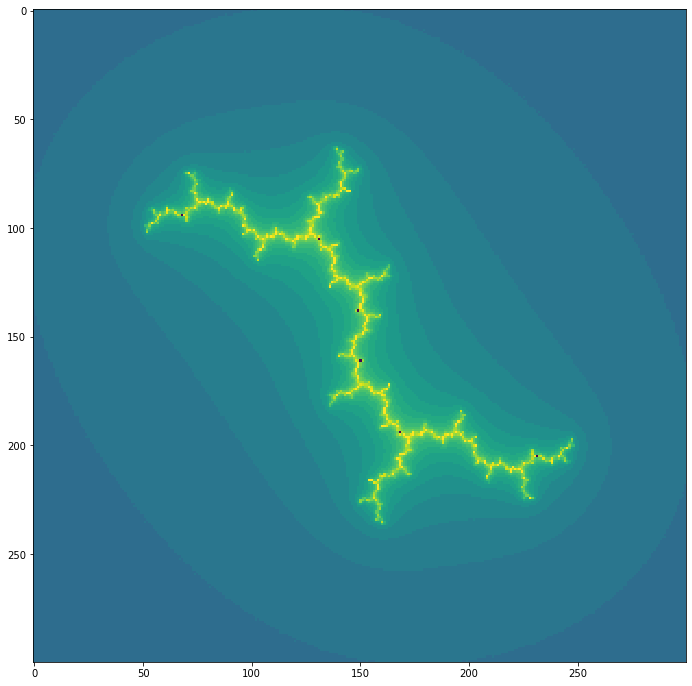

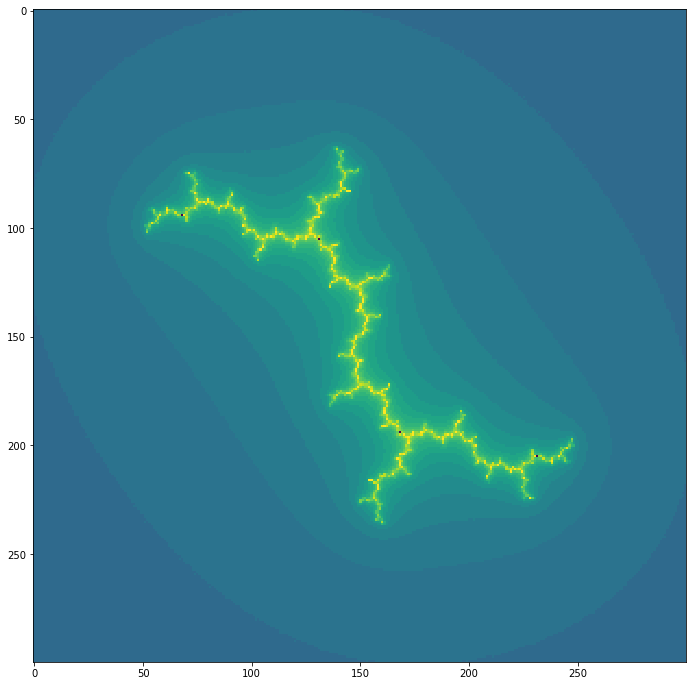

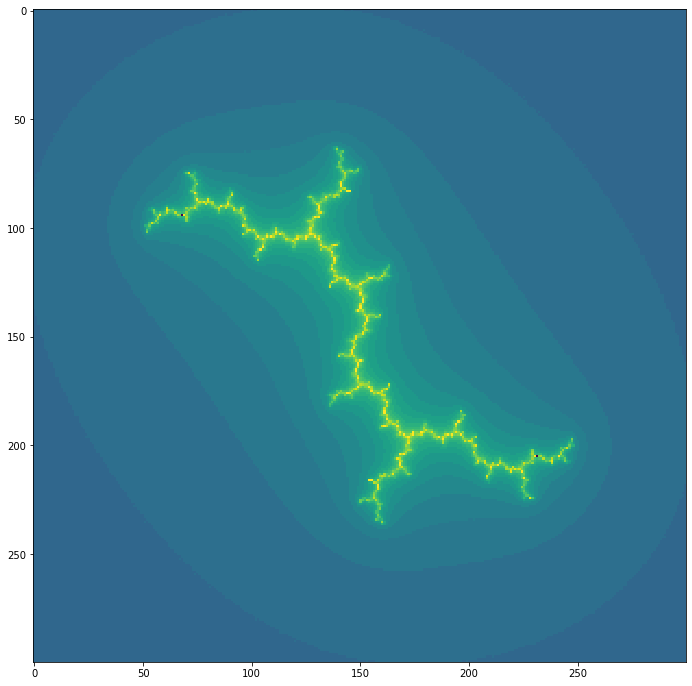

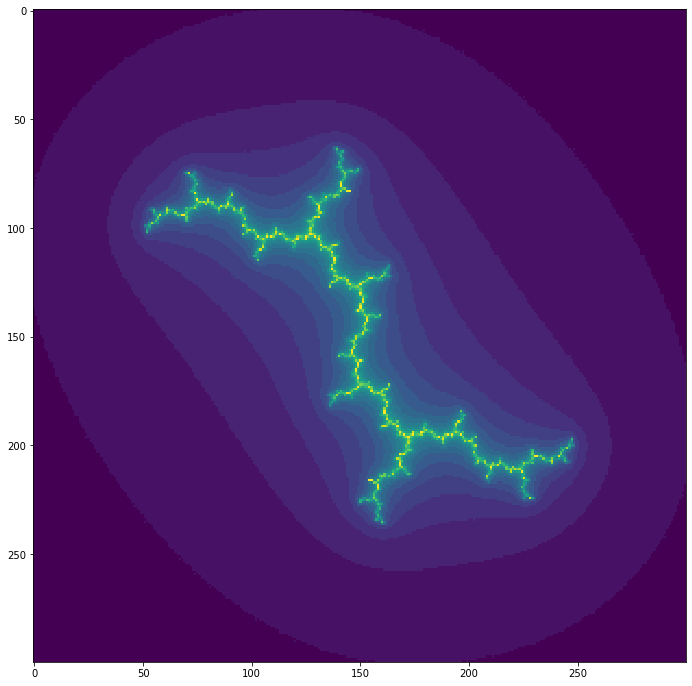

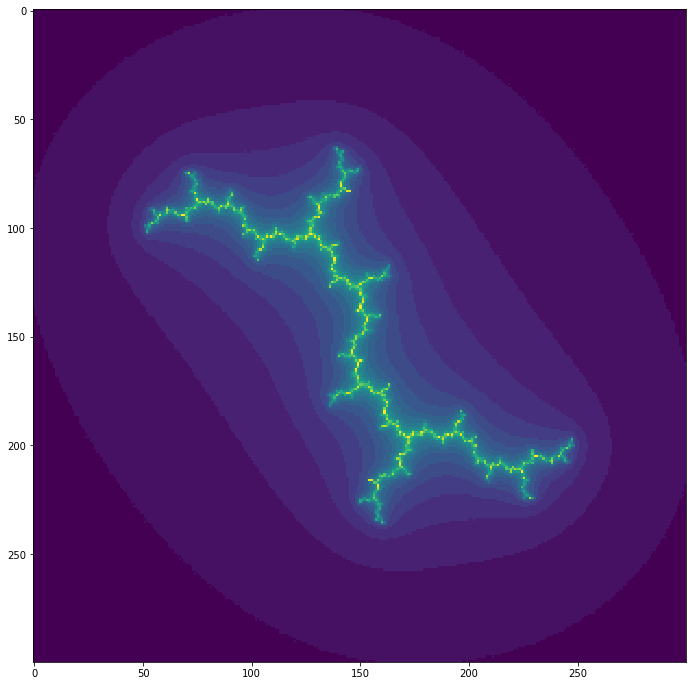

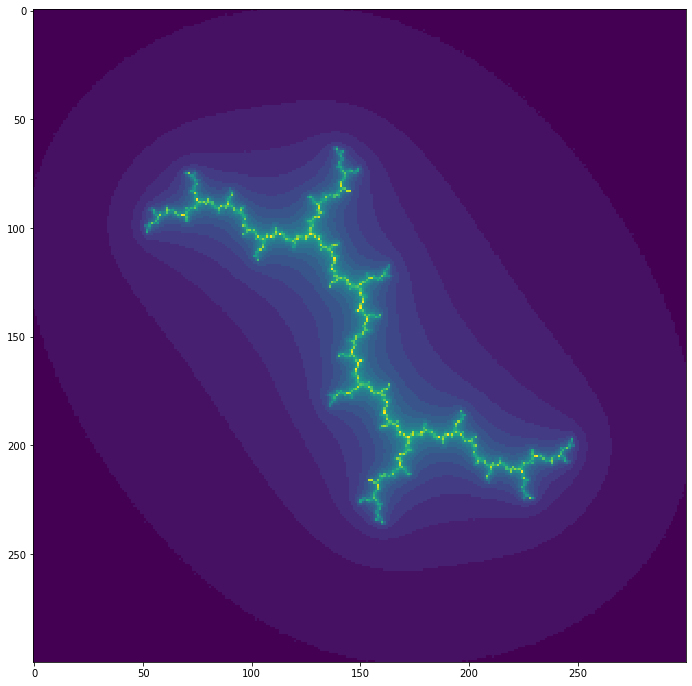

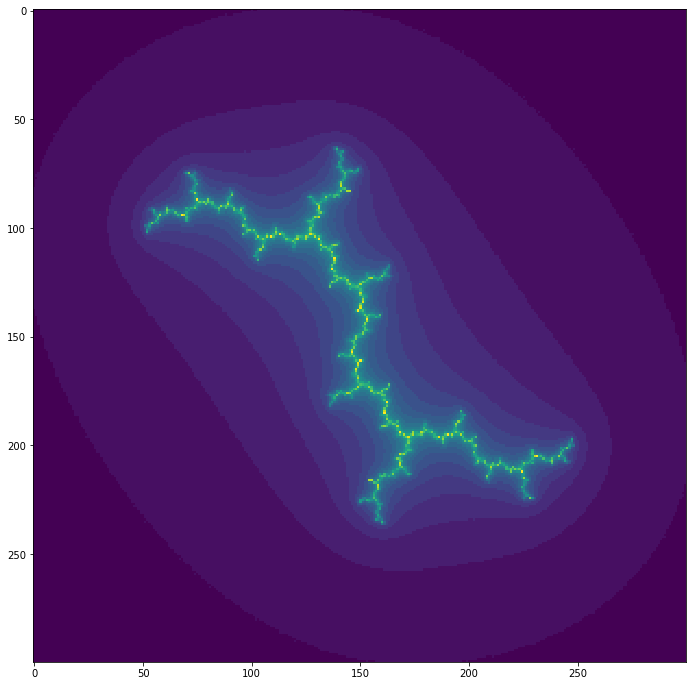

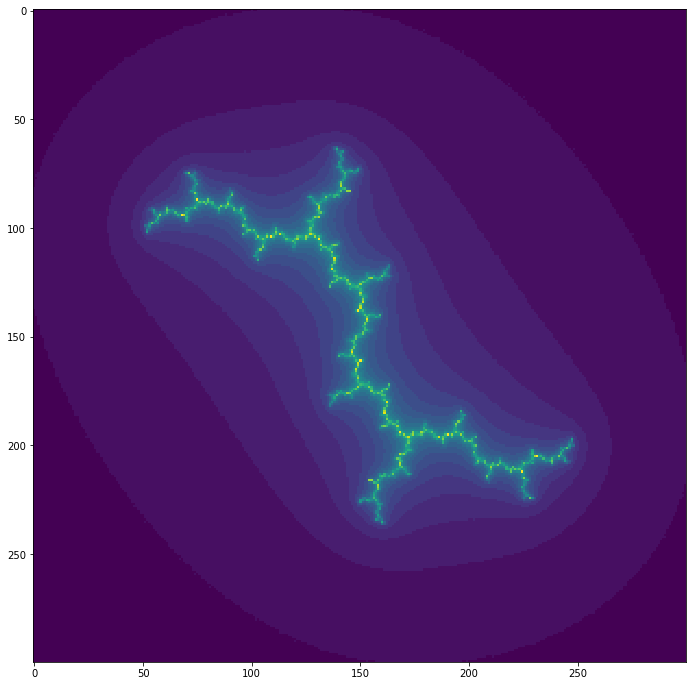

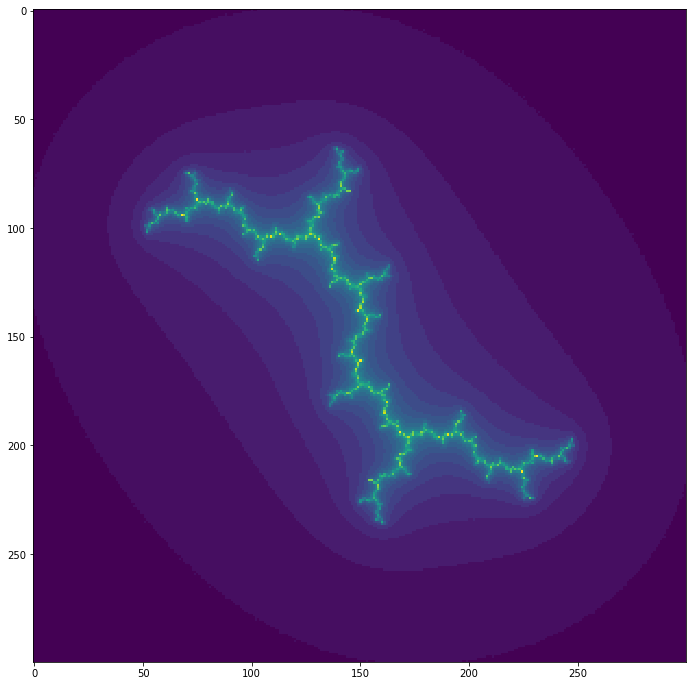

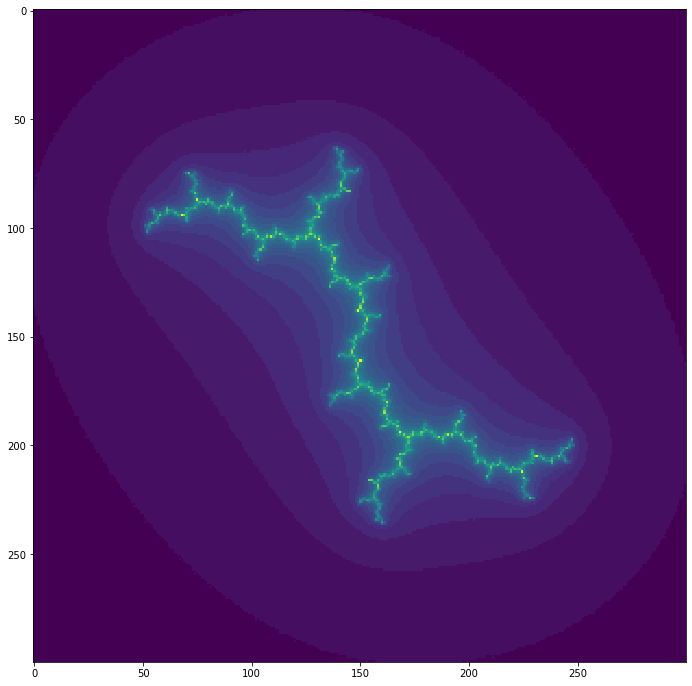

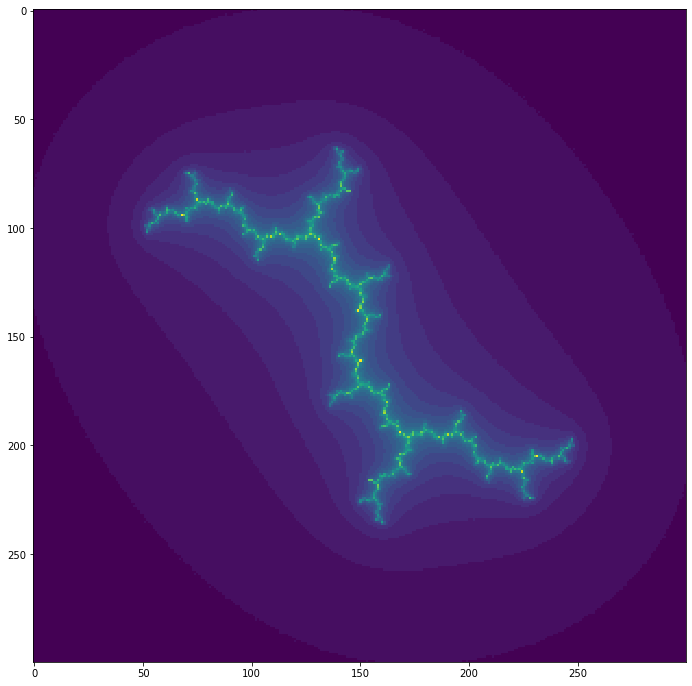

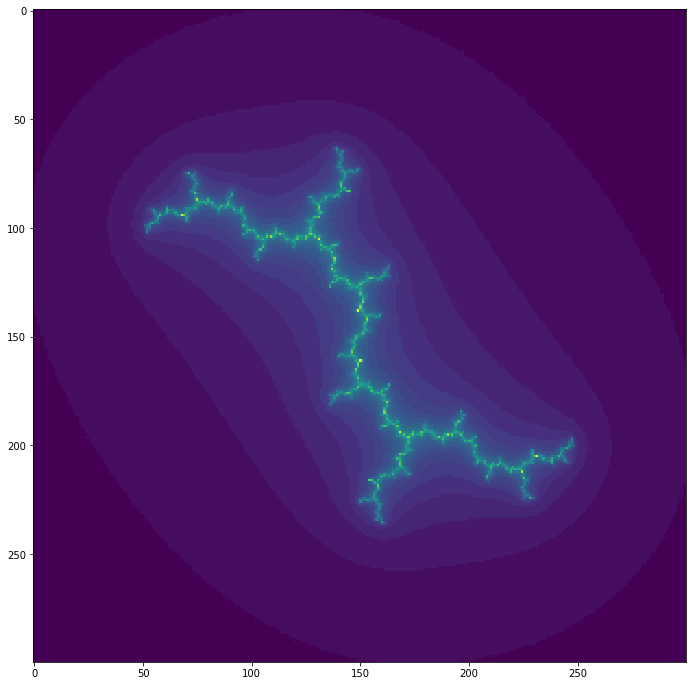

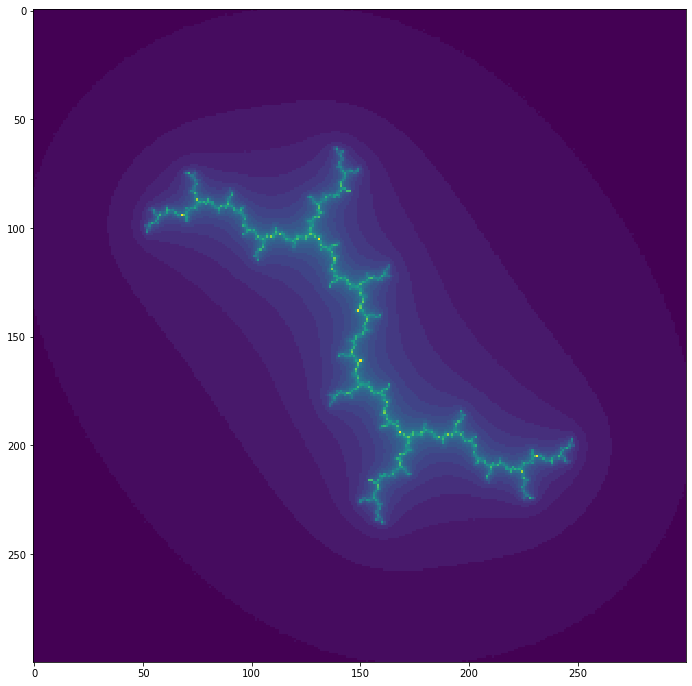

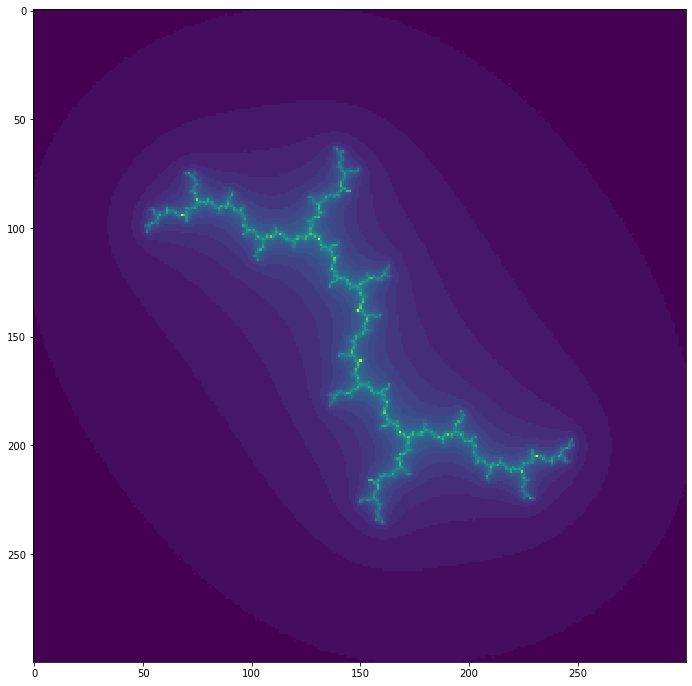

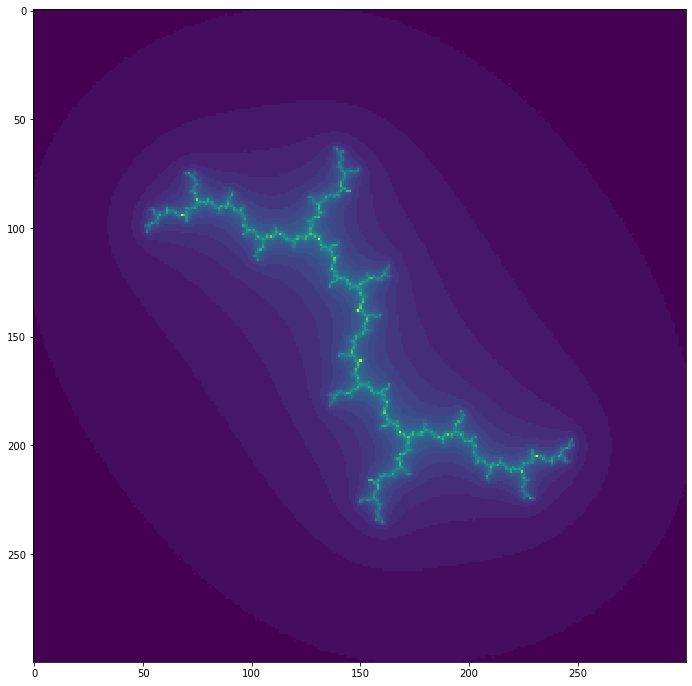

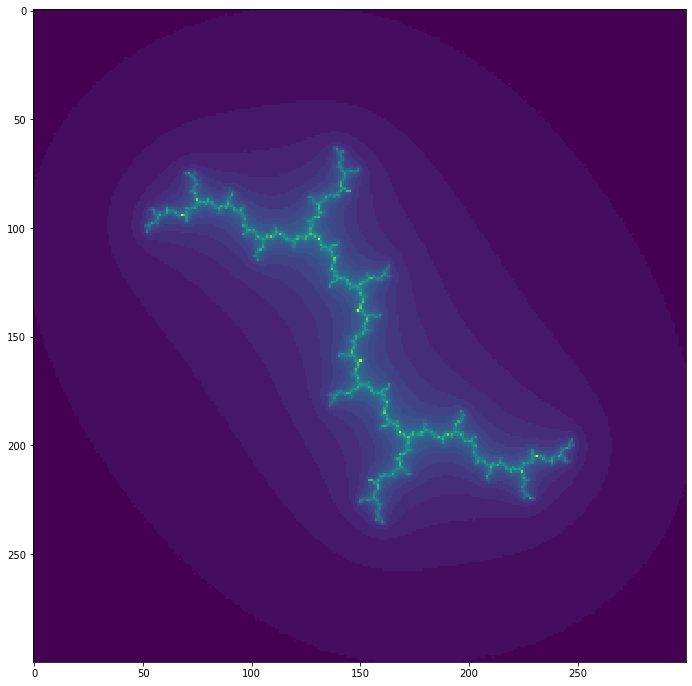

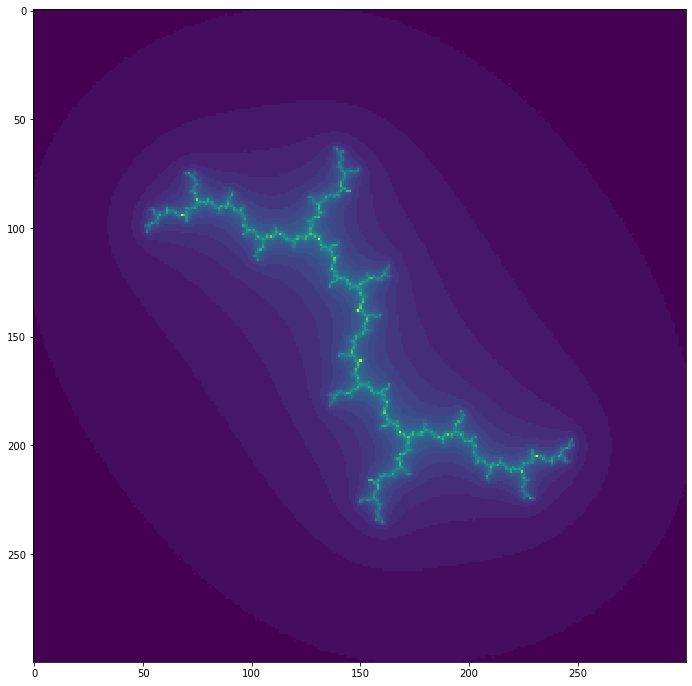

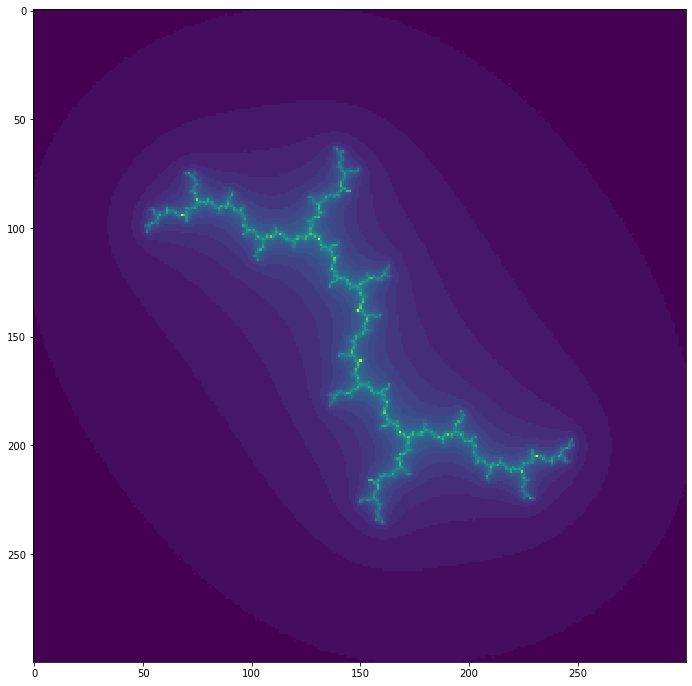

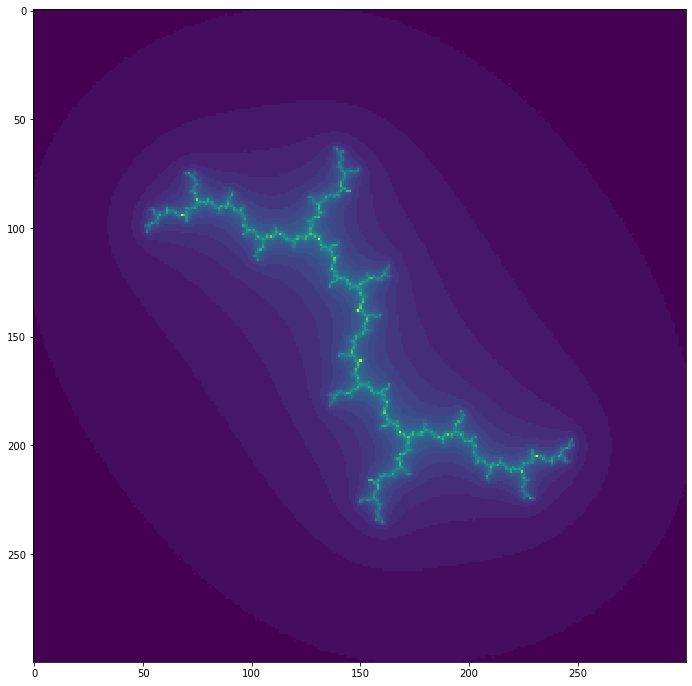

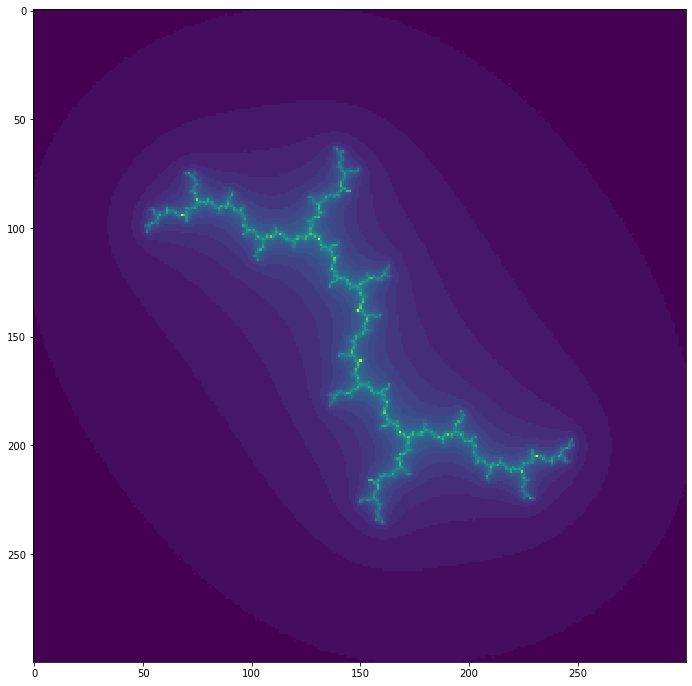

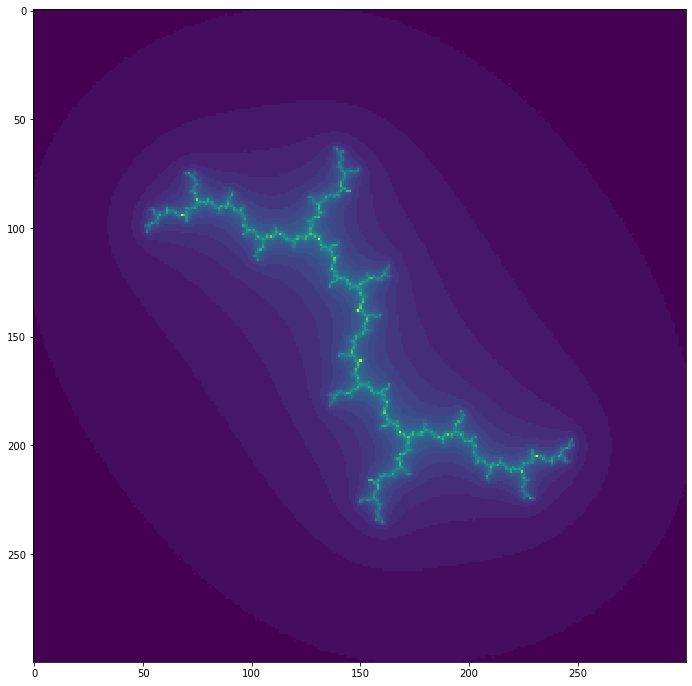

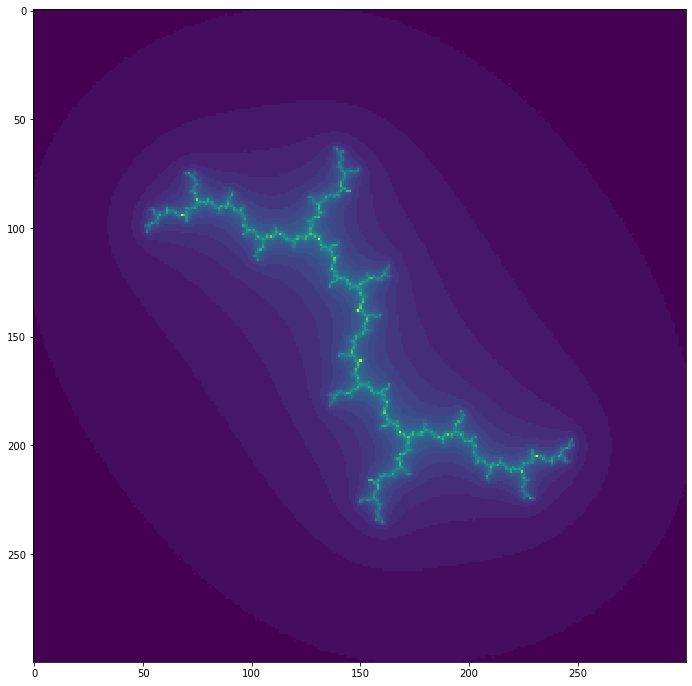

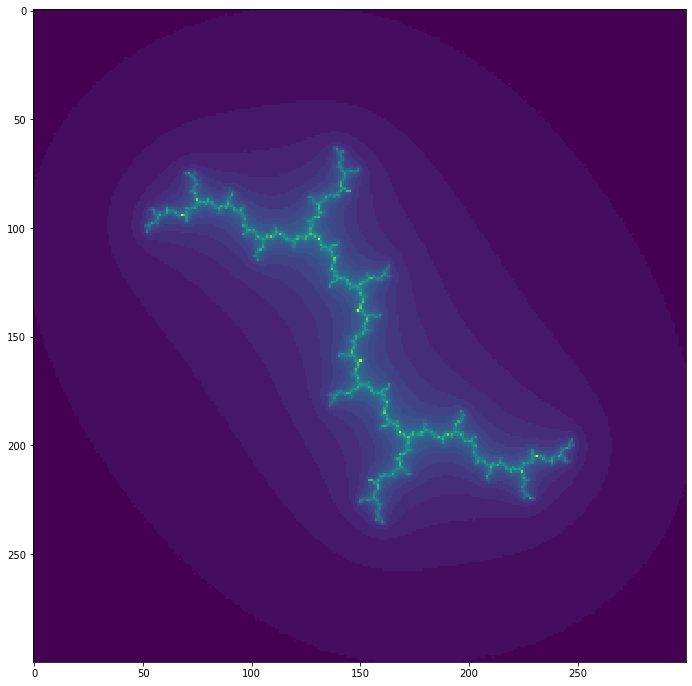

In [7]:
i_window, c_window = init_matrices()
for i in range(1, MAX_ITER + 1):
    i_window, c_window = iterate(i_window, c_window, iteration=i)
    plt.figure(figsize=(12, 12))
    plt.imshow(np.rot90(c_window))